In [1]:
import nltk
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('quora_questions.csv')

In [4]:
data.head(10)

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."
5,Astrology: I am a Capricorn Sun Cap moon and c...
6,Should I buy tiago?
7,How can I be a good geologist?
8,When do you use シ instead of し?
9,Motorola (company): Can I hack my Charter Moto...


In [5]:
print("Data set info:")
data.info()

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404289 entries, 0 to 404288
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  404289 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


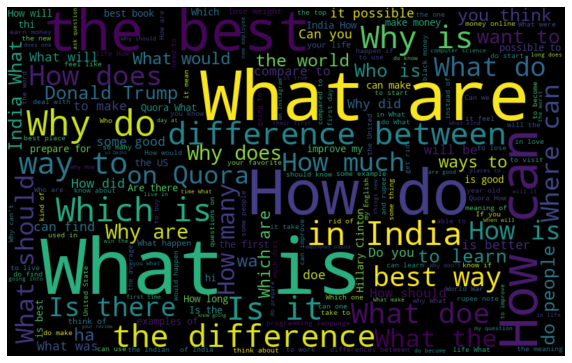

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
%matplotlib inline
doc_words = ' '.join([text for text in data['Question']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(doc_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
model = cv.fit_transform(data['Question'])
model

<404289x38669 sparse matrix of type '<class 'numpy.int64'>'
	with 2002912 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42,verbose=1)
LDA.fit(model)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=1)

In [9]:
len(cv.get_feature_names())

38669

In [10]:
import random
print("Print random features:")
for i in range(20):
    random_id = random.randint(0,36981)
    print(cv.get_feature_names()[random_id])

Print random features:
kibbutz
mentions
supporter
turbo
lease
refill
sectors
sasikala
6years
renge
markov
practicals
injustices
tarantino
prune
distinctive
evetes
blippar
distillation
famines


In [11]:
len(LDA.components_)

7

In [12]:
print('First Topic')
single_topic = LDA.components_[0]
single_topic.argsort()

First Topic


array([34210,  6365, 23296, ..., 26057, 17507,  4632], dtype=int64)

In [13]:
print("Top 10 words for this topic:")
top_indices = single_topic.argsort()[-10:]
for i in top_indices:
    print(cv.get_feature_names()[i])

Top 10 words for this topic:
google
app
android
engineering
does
good
use
phone
india
best


In [14]:
for index,topic in enumerate(LDA.components_):
    print(f'Top 15 Words for topic #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 15 Words for topic #0
['free', 'company', 'using', 'mobile', 'software', 'google', 'app', 'android', 'engineering', 'does', 'good', 'use', 'phone', 'india', 'best']


Top 15 Words for topic #1
['ways', 'programming', 'stop', 'language', 'improve', '1000', 'notes', 'online', '500', 'english', 'make', 'way', 'learn', 'money', 'best']


Top 15 Words for topic #2
['safe', 'book', 'water', 'did', 'compare', 'travel', 'average', 'energy', 'india', 'books', 'best', 'good', 'time', 'does', 'life']


Top 15 Words for topic #3
['make', 'movies', 'thing', 'does', 'question', 'old', 'movie', 'year', 'things', 'questions', 'best', 'know', 'new', 'people', 'quora']


Top 15 Words for topic #4
['country', 'email', 'differences', 'rid', 'password', 'car', 'number', 'instagram', 'increase', 'india', 'job', 'does', 'difference', 'facebook', 'account']


Top 15 Words for topic #5
['girl', 'sex', 'long', 'donald', 'india', 'feel', 'love', 'think', 'mean', 'people', 'world', 'trump', 'did', 'like', 'do

In [15]:
model.shape

(404289, 38669)

In [16]:
len(data)

404289

In [17]:
topic_result = LDA.transform(model)

In [18]:
topic_result.shape

(404289, 7)

In [19]:
topic_result[0]

array([0.01789911, 0.31645888, 0.59414638, 0.01786013, 0.0178879 ,
       0.01787348, 0.01787413])

In [20]:
topic_result[0].round(2)

array([0.02, 0.32, 0.59, 0.02, 0.02, 0.02, 0.02])

In [21]:
topic_result[0].argmax()

2

In [22]:
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [23]:
print("This indicates that the first question is related to topic #i")
topic_result.argmax(axis=1)
data['Topic'] = topic_result.argmax(axis=1)
data.head(20)

This indicates that the first question is related to topic #i


,Question,Topic
0,What is the step by step guide to invest in sh...,2
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,4
2,How can I increase the speed of my internet co...,0
3,Why am I mentally very lonely? How can I solve...,5
4,"Which one dissolve in water quikly sugar, salt...",2
5,Astrology: I am a Capricorn Sun Cap moon and c...,2
6,Should I buy tiago?,4
7,How can I be a good geologist?,2
8,When do you use シ instead of し?,0
9,Motorola (company): Can I hack my Charter Moto...,0
